In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
sw_data=pd.read_csv("FINAL_EDGE_TABLE.csv",usecols=['Origin_Airport_Code','origin_lat','origin_long','passengers','sum_departures_performed'])
sw_airports_location=sw_data[['Origin_Airport_Code','origin_lat','origin_long']].drop_duplicates(keep='first').reset_index(drop=True)
renaming={'Origin_Airport_Code':'IATA','origin_lat':'LATITUDE','origin_long':'LONGITUDE'}
sw_airports_location.rename(columns=renaming,inplace=True)
sw_airports_location

,IATA,LATITUDE,LONGITUDE
0,ABQ,35.040199,-106.609001
1,ALB,42.748299,-73.801697
2,AMA,35.219398,-101.706001
3,ATL,33.636700,-84.428101
4,AUS,30.197535,-97.662015
...,...,...,...
80,SNA,33.675701,-117.867996
81,STL,38.748697,-90.370003
82,TPA,27.975500,-82.533203
83,TUL,36.198399,-95.888100


In [66]:
#Function that calculates the haversine distance between two sets of coordinates
from sklearn.metrics.pairwise import haversine_distances
def haversine(x,y):
    R=6371 #Radius of Earth in KM
    x_rd=np.radians(x)
    y_rd=np.radians(y)
    h=(haversine_distances([x_rd,y_rd]))[0][1]
    d=R*h #Haversine Distance
    return d

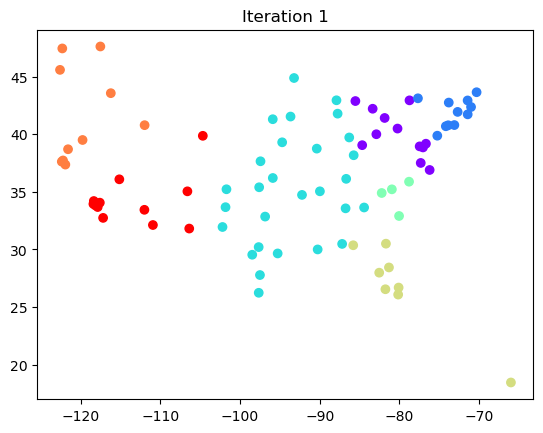

<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>


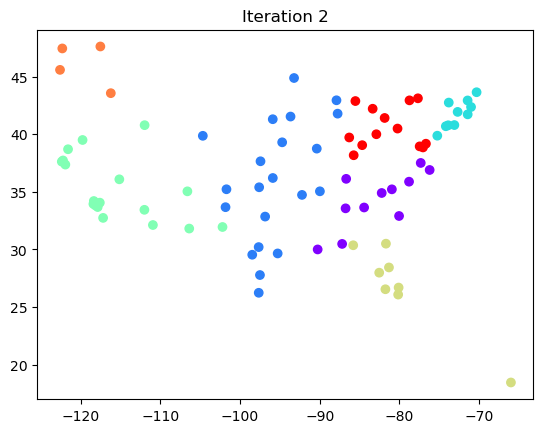

<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>


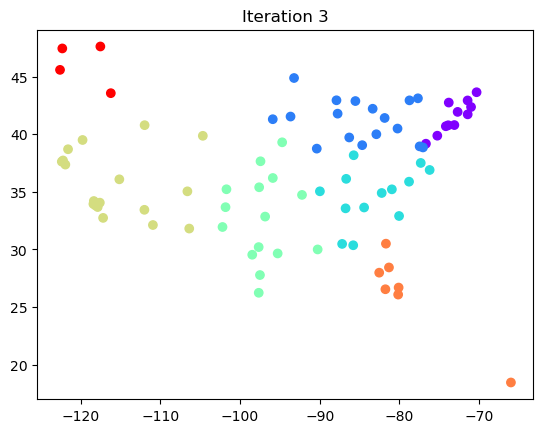

<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>


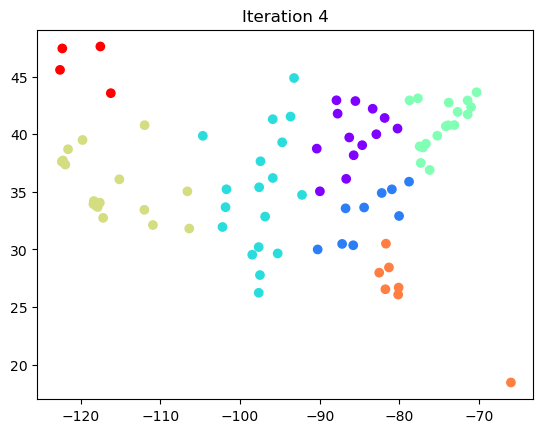

<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>


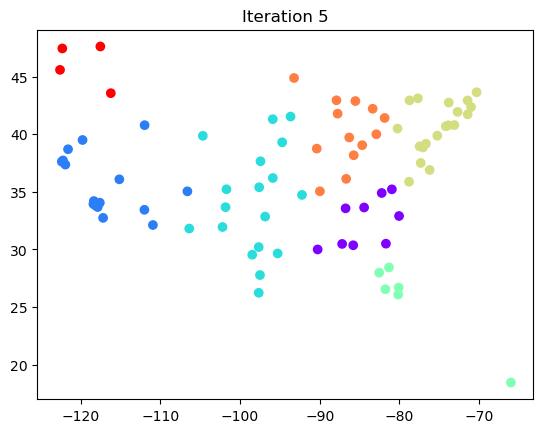

<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>


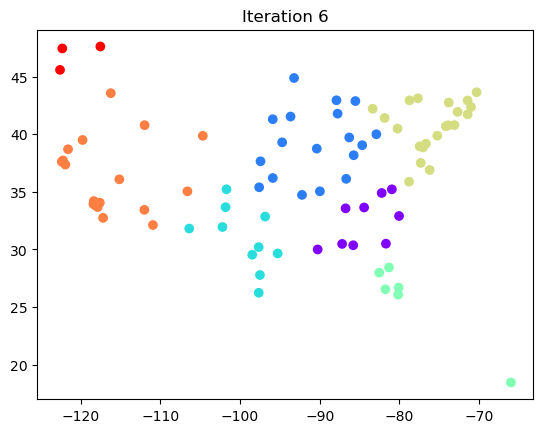

<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>


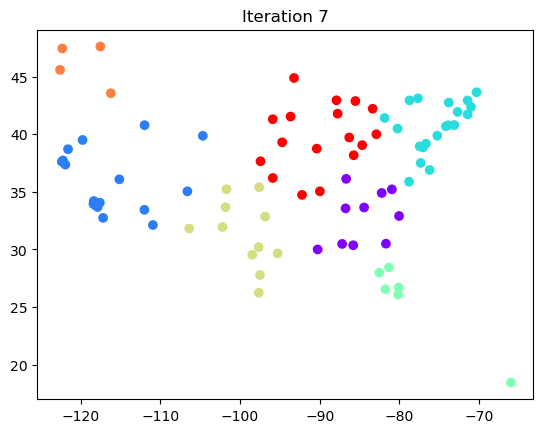

<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>


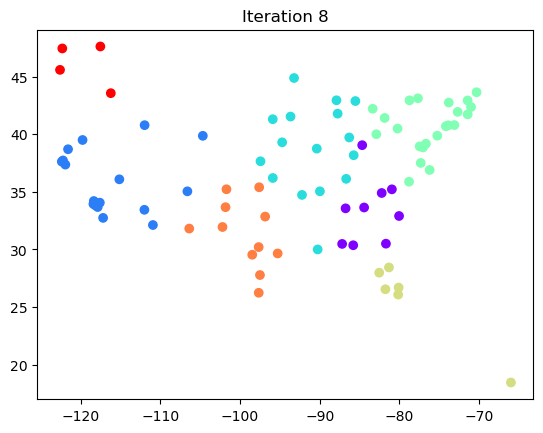

<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>


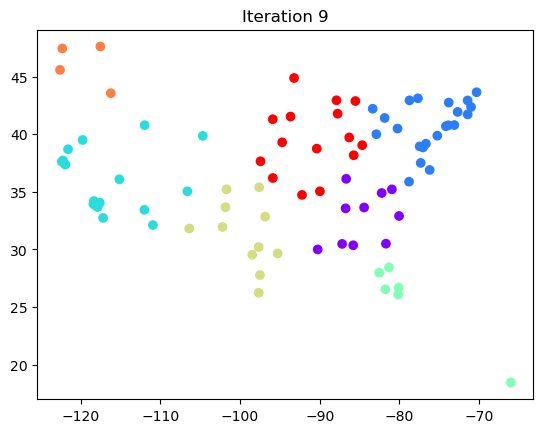

<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
<function haversine_distances at 0x00000190A3ECB940>
Initial centres = {'SJC', 'SNA', 'LGA', 'RDU', 'MEM', 'IAD', 'RSW'}
Final centres = {'BWI', 'SEA', 'LAS', 'STL', 'ATL', 'SAT', 'PBI'}
No. of iterations = 9


In [68]:
#Setting all the fixed pre-requisite values
coordinates=sw_airports_location.values[:,1:3]
codes=sw_airports_location.values[:,0]
weights=np.ones(85)
no_of_clusters=7
distance_matrix=np.zeros((codes.size,no_of_clusters))
counter=0

#Randomly chooses k points that serve as the initial cluster centres
idx=np.random.choice(codes.size,no_of_clusters,replace=False)
new_centres=list((codes[idx]))
initial_centres=set(new_centres)
old_centres=[]
centres_coords=coordinates[idx,:]   

#Running a loop till the cluster centres converge
while(set(old_centres)!=set(new_centres)):
    
    #The cluster centres of the previous iteration become old clusters now
    old_centres=new_centres
    
    #Calculates the distance between each point and every centre and stores in the data matrix
    k,l=0,0
    for i in coordinates:
        for j in centres_coords:
            distance_matrix[k][l]=haversine(list(i),list(j))
            l=l+1
        l=0
        k=k+1
        
    #Assigns each point to a cluster
    #Labels each point with the cluster centre closest to it and adds it as an attribute to the dataframe
    labels=[]
    for i in distance_matrix:
        i=list(i)
        labels.append(new_centres[i.index(min(i))])
    sw_airports_location['LABELS']=labels
    
    #Plotting the clusters
    plt.scatter(coordinates[:,1],coordinates[:,0],c=pd.Categorical(labels).codes,cmap=plt.cm.rainbow)
    plt.title('Iteration '+str(counter+1))
    plt.show();
    
    #For each cluster, finds out the weighted average of all latitudes and longitudes (Virtual point)
    #Makes that point the cluster centre whose haversine distance from the virtual point is least
    #Assigns all new cluster centres coordinates by replacing old ones
    centres_coords=[]
    for centres in np.unique(labels):
        a=sw_airports_location.loc[sw_airports_location['LABELS']==centres][['LATITUDE','LONGITUDE']].values
        h_distances=np.zeros(a.shape[0])
        print(haversine_distances)
        for i in range(h_distances.size):
            h_distances[i]=haversine(list(a[i,:]),[0,0])
        j=np.average(h_distances)
        centres_coords.append(a[np.argmin(np.abs(h_distances-j)),:])
        
    
    #Finding the corresponding airports to the newly found cluster centre coordinates
    new_centres=[]
    for i in centres_coords:
        new_centres.append(sw_airports_location.iloc[sw_airports_location.index[(sw_airports_location['LATITUDE']==i[0]) & 
                                                         (sw_airports_location['LONGITUDE']==i[1])].tolist()[0]]['IATA'])
    
    #Increasing the counter for every iteration
    counter=counter+1
    
print('Initial centres =',initial_centres)    
print('Final centres =',set(new_centres))
print('No. of iterations =',counter)